## KELOMPOK 3

- Kasyful Haq Bachariputra (2304820)
- Muhammad Akhtar Rizki Ramadha (2304742)
- Ibnu Fadhilah (2300613)
- Muhammad Naufal Arbanin (2310850)
- Hanif Ahmad Syauqi (2304330)

## PENDAHULUAN


Pada tugas kali ini, akan dilakukan pembuatan model machine learning menggunakan data dari sebuah online shop. Model machine learning ini akan melakukan prediksi apakah dalam satu buah session pelanggan akan membuat sebuah order atau tidak.

Notebook ini adalah hasil analisis data transaksi yang melibatkan langkah-langkah pembersihan data, pengisian nilai yang hilang, dan penggunaan model Random Forest untuk memprediksi hasil. Berikut ini adalah rangkuman tahapan dalam notebook ini:

1. Persiapan Data: Menggunakan dataset latihan, dilakukan terlebih dahulu EDA untuk mengetahui keadaan awal dari data.

2. Pembuatan Model: Model Random Forest dikembangkan dengan membagi data menjadi data latih dan validasi, kemudian dilakukan penskalaan data. Model ini dievaluasi menggunakan matriks kebingungan dan laporan klasifikasi.

3. Prediksi Data Uji: Data uji juga diproses dan diprediksi menggunakan model yang telah dilatih.

In [42]:
# Melakukan import library
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sn
# Melakukan EDA pada dataset training
df_train = pd.read_csv("transact_train.txt", sep='|')

df_train = df_train.replace('?', np.nan) # Mengganti '?' dengan not a number, sehingga akan terlihat data mana yang kosong

# Melihat secara sekilas jumlah order yang memiliki nilai 'y' dan nilai 'n'
df_train['order'].value_counts()

order
y    290030
n    138983
Name: count, dtype: int64

## MODEL

In [43]:
# Kolom yang digunakan beserta Penjelasannya
# startWeekday (column 2)     = berisi hari mulai dari sesi (senin, selasa, rabu, dst.)
# duration (column 3)         = berisi berapa detik yang telah berjalan dari start sesi
# cCount (column 4)           = berisi jumlah produk yang diklik
# cMinPrice (column 5)        = berisi produk paling murah yang diklik
# cMaxPrice (column 6)        = berisi prduk paling mahal yang diklik
# cSumPrice (column 7)        = berisi jumlah harga dari semua produk yang diklik
# bCount (column 8)           = berisi jumlah produk yang dimasukkan ke shopping basket
# bMaxPrice (column 10)       = berisi produk paling mahal yang dimasukkan ke shopping basket
# bSumPrice (column 11)       = berisi jumlah harga dari semua produk yang dimasukkan ke shopping basket
# bStep (column 12)           = berisi sampai step mana pembelian dilakukan
# maxVal (column 16)          = berisi harga yang diperbolehkan beli untuk customer
# accountLifetime (column 18) = berisi berapa bulan lifetime dari akun customer
# payments (column 19)        = berisi jumlah payments yang dilakukan oleh customer
# age (column 20)             = berisi umur dari customer
# lastOrder (column 22)       = berisi berisi berapa hari customer terakhir kali membeli


# Menentukan feature mana saja yang akan digunakan dalam model
X = df_train.iloc[:, [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 16, 18, 19, 20, 22]].values
# Menentukan target hasil prediksi
Y = df_train.iloc[:, -1].values

In [44]:
# Melakukan import library
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Membagi dua dataset menjadi data training dan data validation
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Melakuakn scaling data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Menggunakan model RandomForest untuk data learning
classi = RandomForestClassifier(n_estimators=50, random_state=0)
classi.fit(x_train, y_train)

# Melakukan prediksi
y_pred = classi.predict(x_test)

# Membuat confusion matrix serta accuracy score untuk evaluasi
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(cm)
print(classification_report(y_test, y_pred))

[[23085  4672]
 [ 2606 55440]]
              precision    recall  f1-score   support

           n       0.90      0.83      0.86     27757
           y       0.92      0.96      0.94     58046

    accuracy                           0.92     85803
   macro avg       0.91      0.89      0.90     85803
weighted avg       0.91      0.92      0.91     85803



In [45]:
# Melakukan import data test dan melakukan EDA
df_test = pd.read_csv("transact_class.txt", sep="|")

# Mengubah "?" menjadi not a number
df_test = df_test.replace('?', np.nan)

# Menentukan feature/kolom yang akan digunakan
x = df_test.iloc[:, [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 16, 18, 19, 20, 22]].values

# Melakukan scaling data
scaler = StandardScaler()
x_test = scaler.fit_transform(x)

# Melakukan prediksi menggunakan model yang telah ada
predicted_test = classi.predict(x_test)
# Menambahkan kolom 'predicted_order' pada dataframe 'df_test'
df_test['predicted_order'] = predicted_test

# Melihat jumlah order yang diprediksi menjadi 'y' dan 'n'
df_test['predicted_order'].value_counts()


predicted_order
y    30772
n    14296
Name: count, dtype: int64

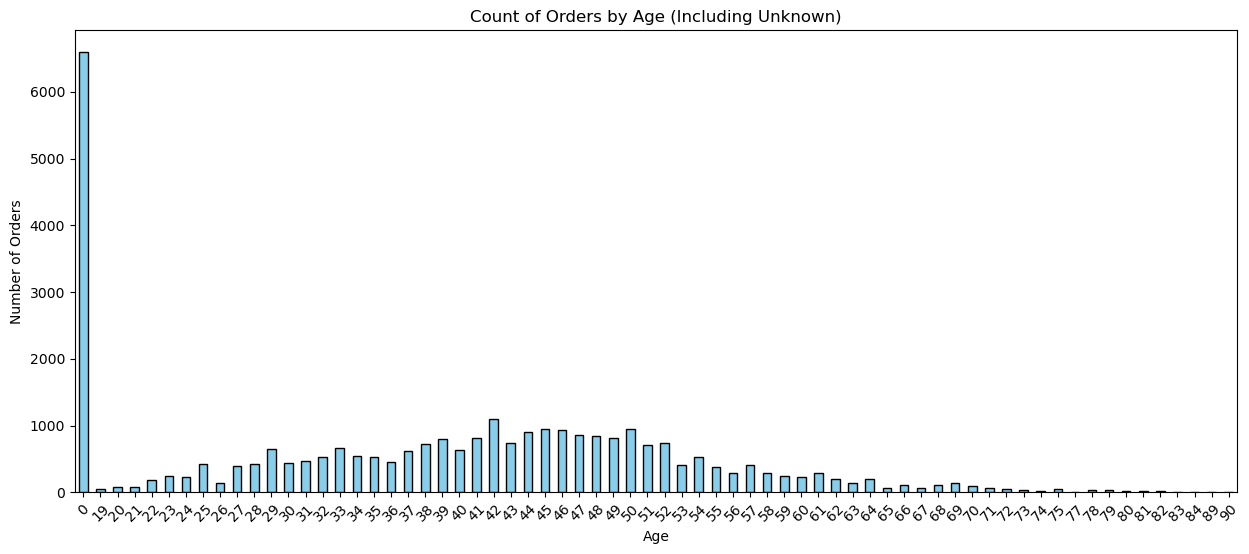

In [46]:
# Menambah kolom baru untuk age yang sudah diintegrasikan dengan data kosong, sehingga akan muncul dalam plot

df_test["age_cleaned"] = pd.to_numeric(df_test["age"], errors="coerce")  # Ubah umur yang valid menjadi numeric
df_test["age_cleaned"] = df_test["age_cleaned"].fillna(0).astype(int)    # Mengubah bentuk age_cleaned menjadi integer

# Melakukan filter untuk order yang bernilai 'y'
orders = df_test[df_test["predicted_order"] == "y"]

# hitung jumlah berdasarkan umur (termasuk "Unknown", yang pada plot ini diwakili menjadi 0)
order_counts = orders["age_cleaned"].value_counts().sort_index()

# Buat bar plot 
plt.figure(figsize=(15, 6))
order_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Menambahkan label dan judul
plt.title("Count of Orders by Age (Including Unknown)")
plt.xlabel("Age")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

Dapat dilihat apabila not a number/unknown (dalam kasus ini diwakili dengan 0) dimasukkan ke dalam plot yang melakukan order, terdapat cukup banyak data not a number/unknown yang terdapat pada kolom 'age'. Hal ini dapat disebabkan oleh akun customer yang tidak menentukan umur di akun mereka. Sehingga banyak sekali yang melakukan order tanpa menentukan umur pada akun customer mereka.

In [47]:
# Menambah data pada kolom yang merupakan tipe data float atau int menggunakan mean
num = df_test.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
df_test[num] = num_imputer.fit_transform(df_test[num])
# Menambah data pada kolom yang merupakan tipe data object menggunakan 'most_frequent'
obj = df_test.select_dtypes(include='object').columns
obj_imputer = SimpleImputer(strategy='most_frequent')
df_test[obj] = obj_imputer.fit_transform(df_test[obj])
# Menentukan feature
x = df_test.iloc[:, [2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 16, 18, 19, 20, 22]].values
# Melakukan scaling data
scaler = StandardScaler()
x_test = scaler.fit_transform(x)
# Melakukan prediksi menggunakan model yang telah ada
predicted_test = classi.predict(x_test)
# Menambahkan kolom 'predicted_order' pada dataframe 'df_test'
df_test['predicted_order'] = predicted_test

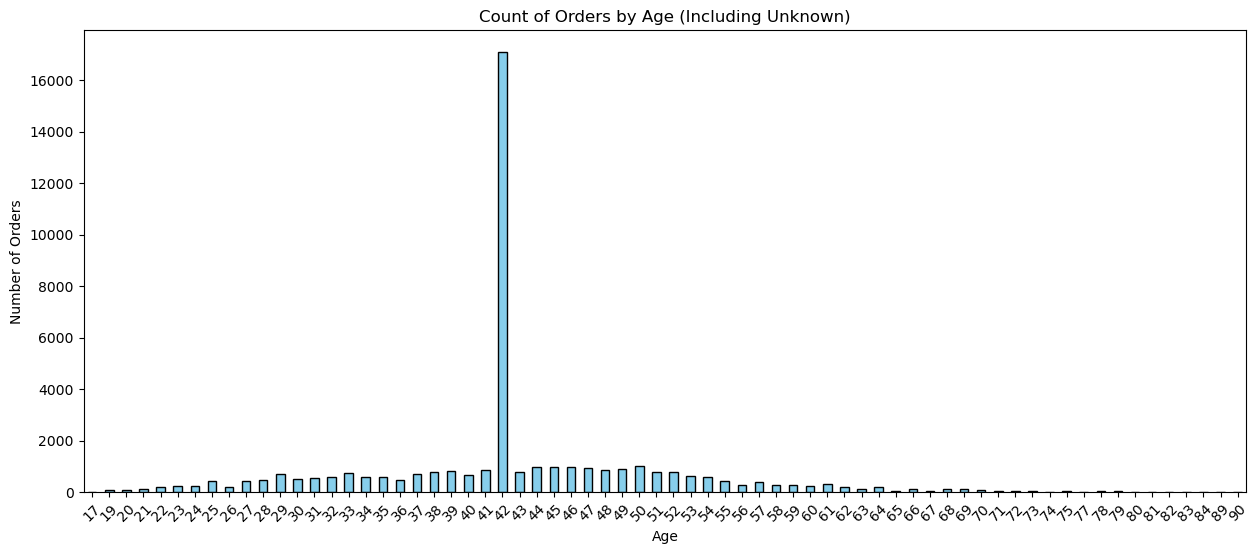

In [48]:
# Menambah kolom baru untuk age yang sudah diintegrasikan dengan data kosong, sehingga akan muncul dalam plot

df_test["age_cleaned"] = pd.to_numeric(df_test["age"], errors="coerce")  # Ubah umur yang valid menjadi numeric
df_test["age_cleaned"] = df_test["age_cleaned"].fillna(0).astype(int)    # Mengubah bentuk age_cleaned menjadi integer

# Melakukan filter untuk order yang bernilai 'y'
orders = df_test[df_test["predicted_order"] == "y"]

# hitung jumlah berdasarkan umur (termasuk "Unknown", yang pada plot ini diwakili menjadi 0)
order_counts = orders["age_cleaned"].value_counts().sort_index()

# Buat bar plot 
plt.figure(figsize=(15, 6))
order_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Menambahkan label dan judul
plt.title("Count of Orders by Age (Including Unknown)")
plt.xlabel("Age")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()